In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option("display.max_columns", None) # tüm sütunları gösterir

In [3]:
import math
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import missingno as msno # kayıp dataları görselleştirmek için
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("vgsales.csv")

In [5]:
data.shape

(16598, 11)

In [6]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
drop_row_index = data[data["Year"]>2015].index
data = data.drop(drop_row_index)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
data.shape

(16250, 11)

In [11]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
data.describe(include=["object","bool"])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [13]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
data["Genre"].value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

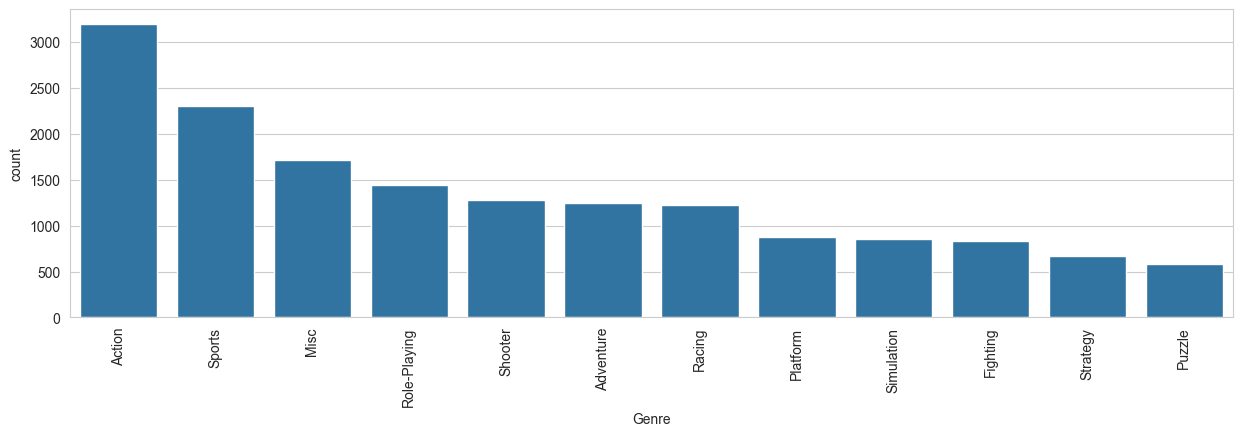

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(x="Genre", data=data, order=data["Genre"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

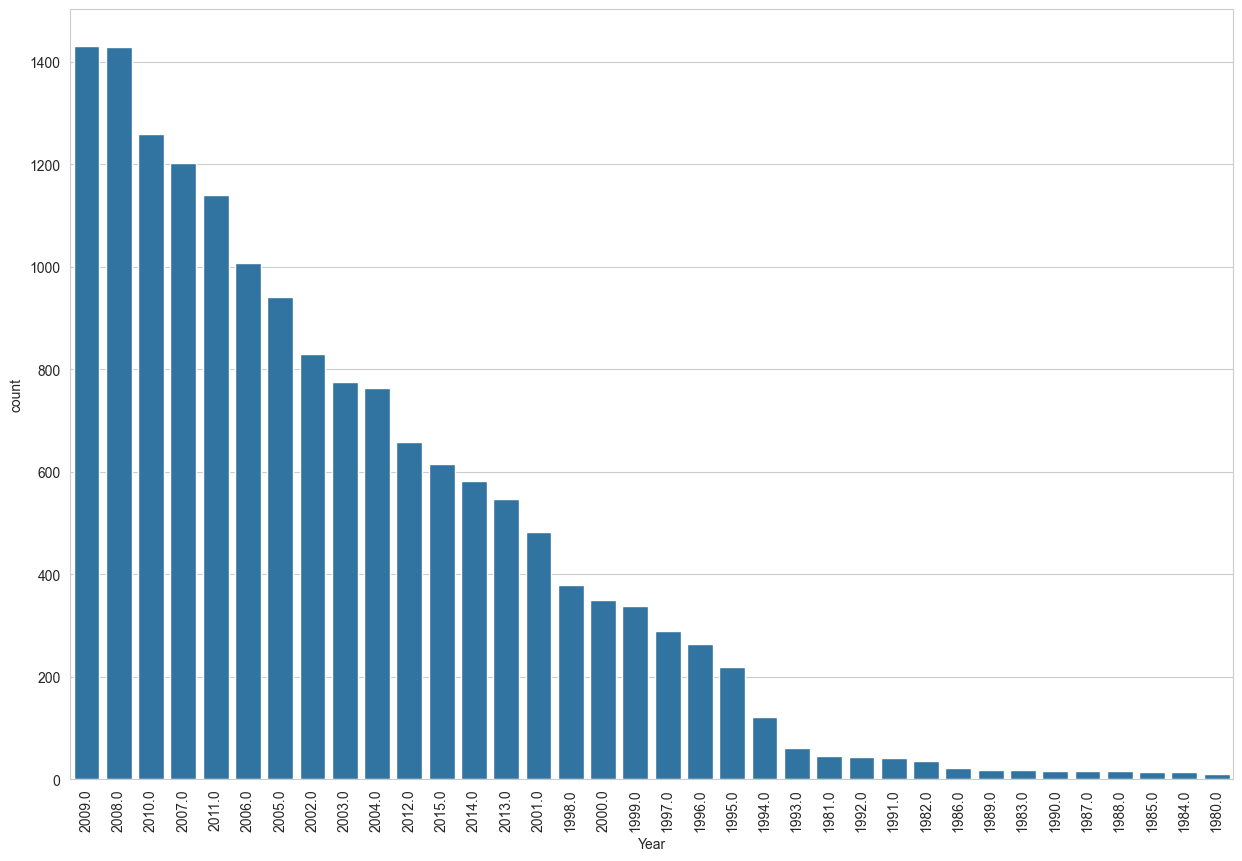

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="Year", data=data, order=data.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

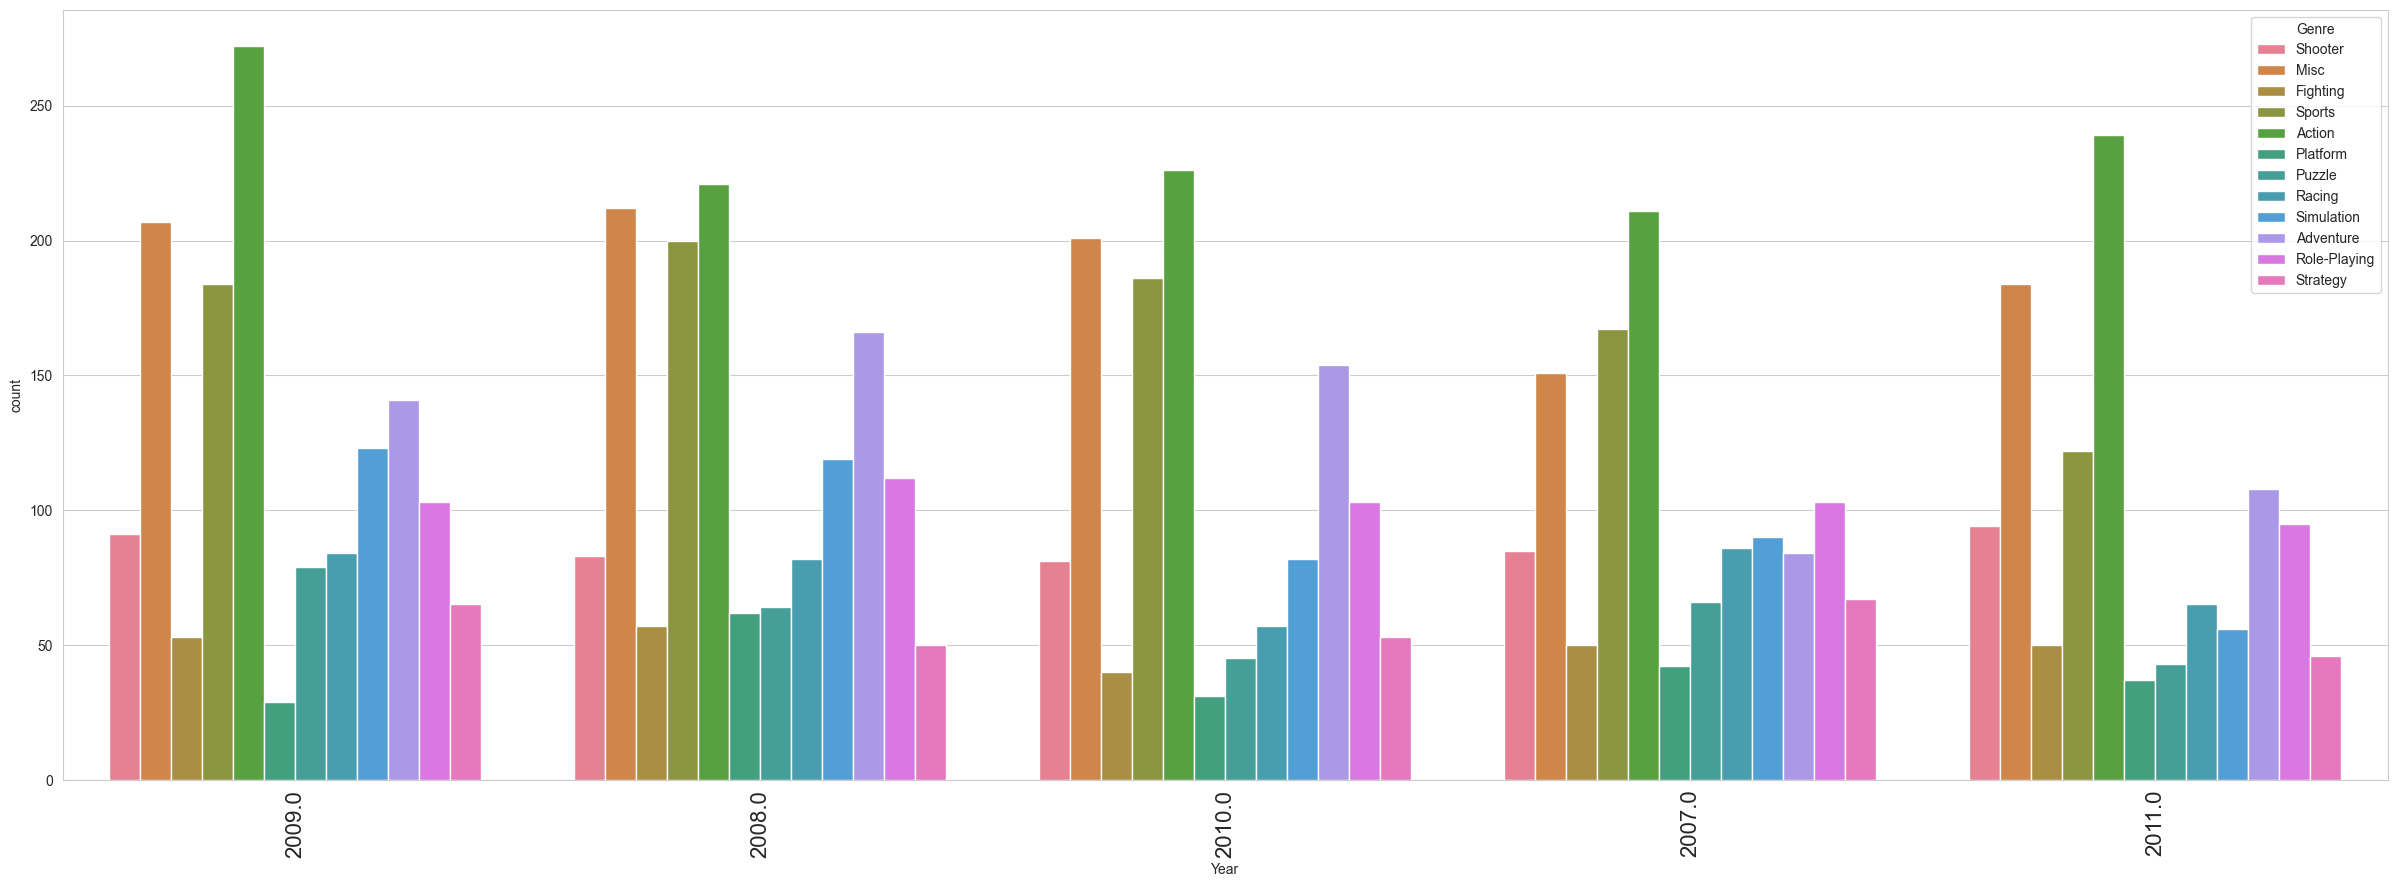

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(x="Year", data=data,hue="Genre", order=data.Year.value_counts().iloc[:5].index)
plt.xticks(rotation=90, size=16)
plt.show()

In [18]:
data_year = data.groupby(by=["Year"])["Global_Sales"].sum() # hangi yıl fünya genelinde daha yüksek satış
data_year = data_year.reset_index()

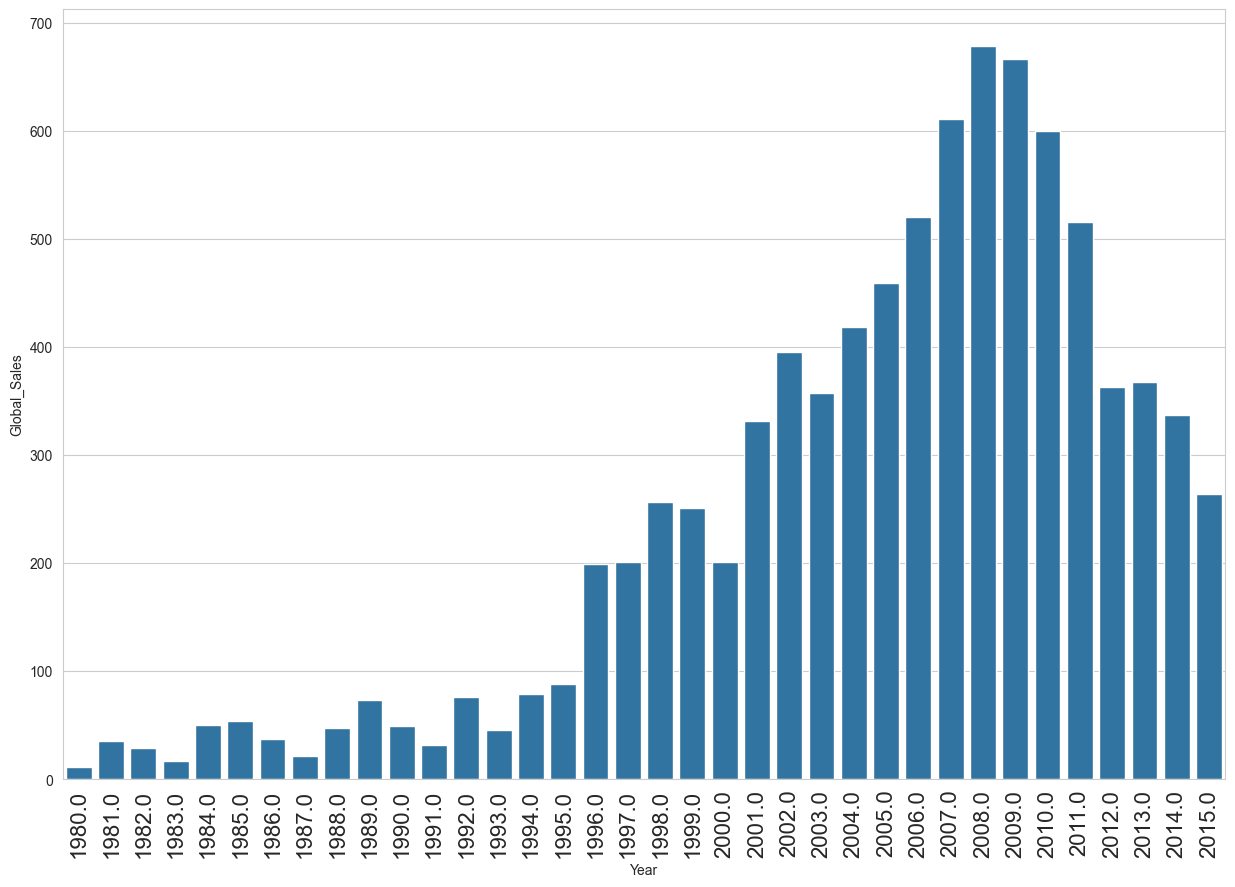

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x="Year", y="Global_Sales",data=data_year)
plt.xticks(rotation=90, size=16)
plt.show()

In [20]:
# yıllara göre en çok üretilen oyun türleri

year_max_df = data.groupby(by=["Year","Genre"]).size().reset_index(name="count")
year_max_idx = year_max_df.groupby(["Year"])["count"].transform("max") == year_max_df["count"]
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year","count"],keep="last").reset_index(drop=True)

In [21]:
genre = year_max_genre["Genre"].values
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

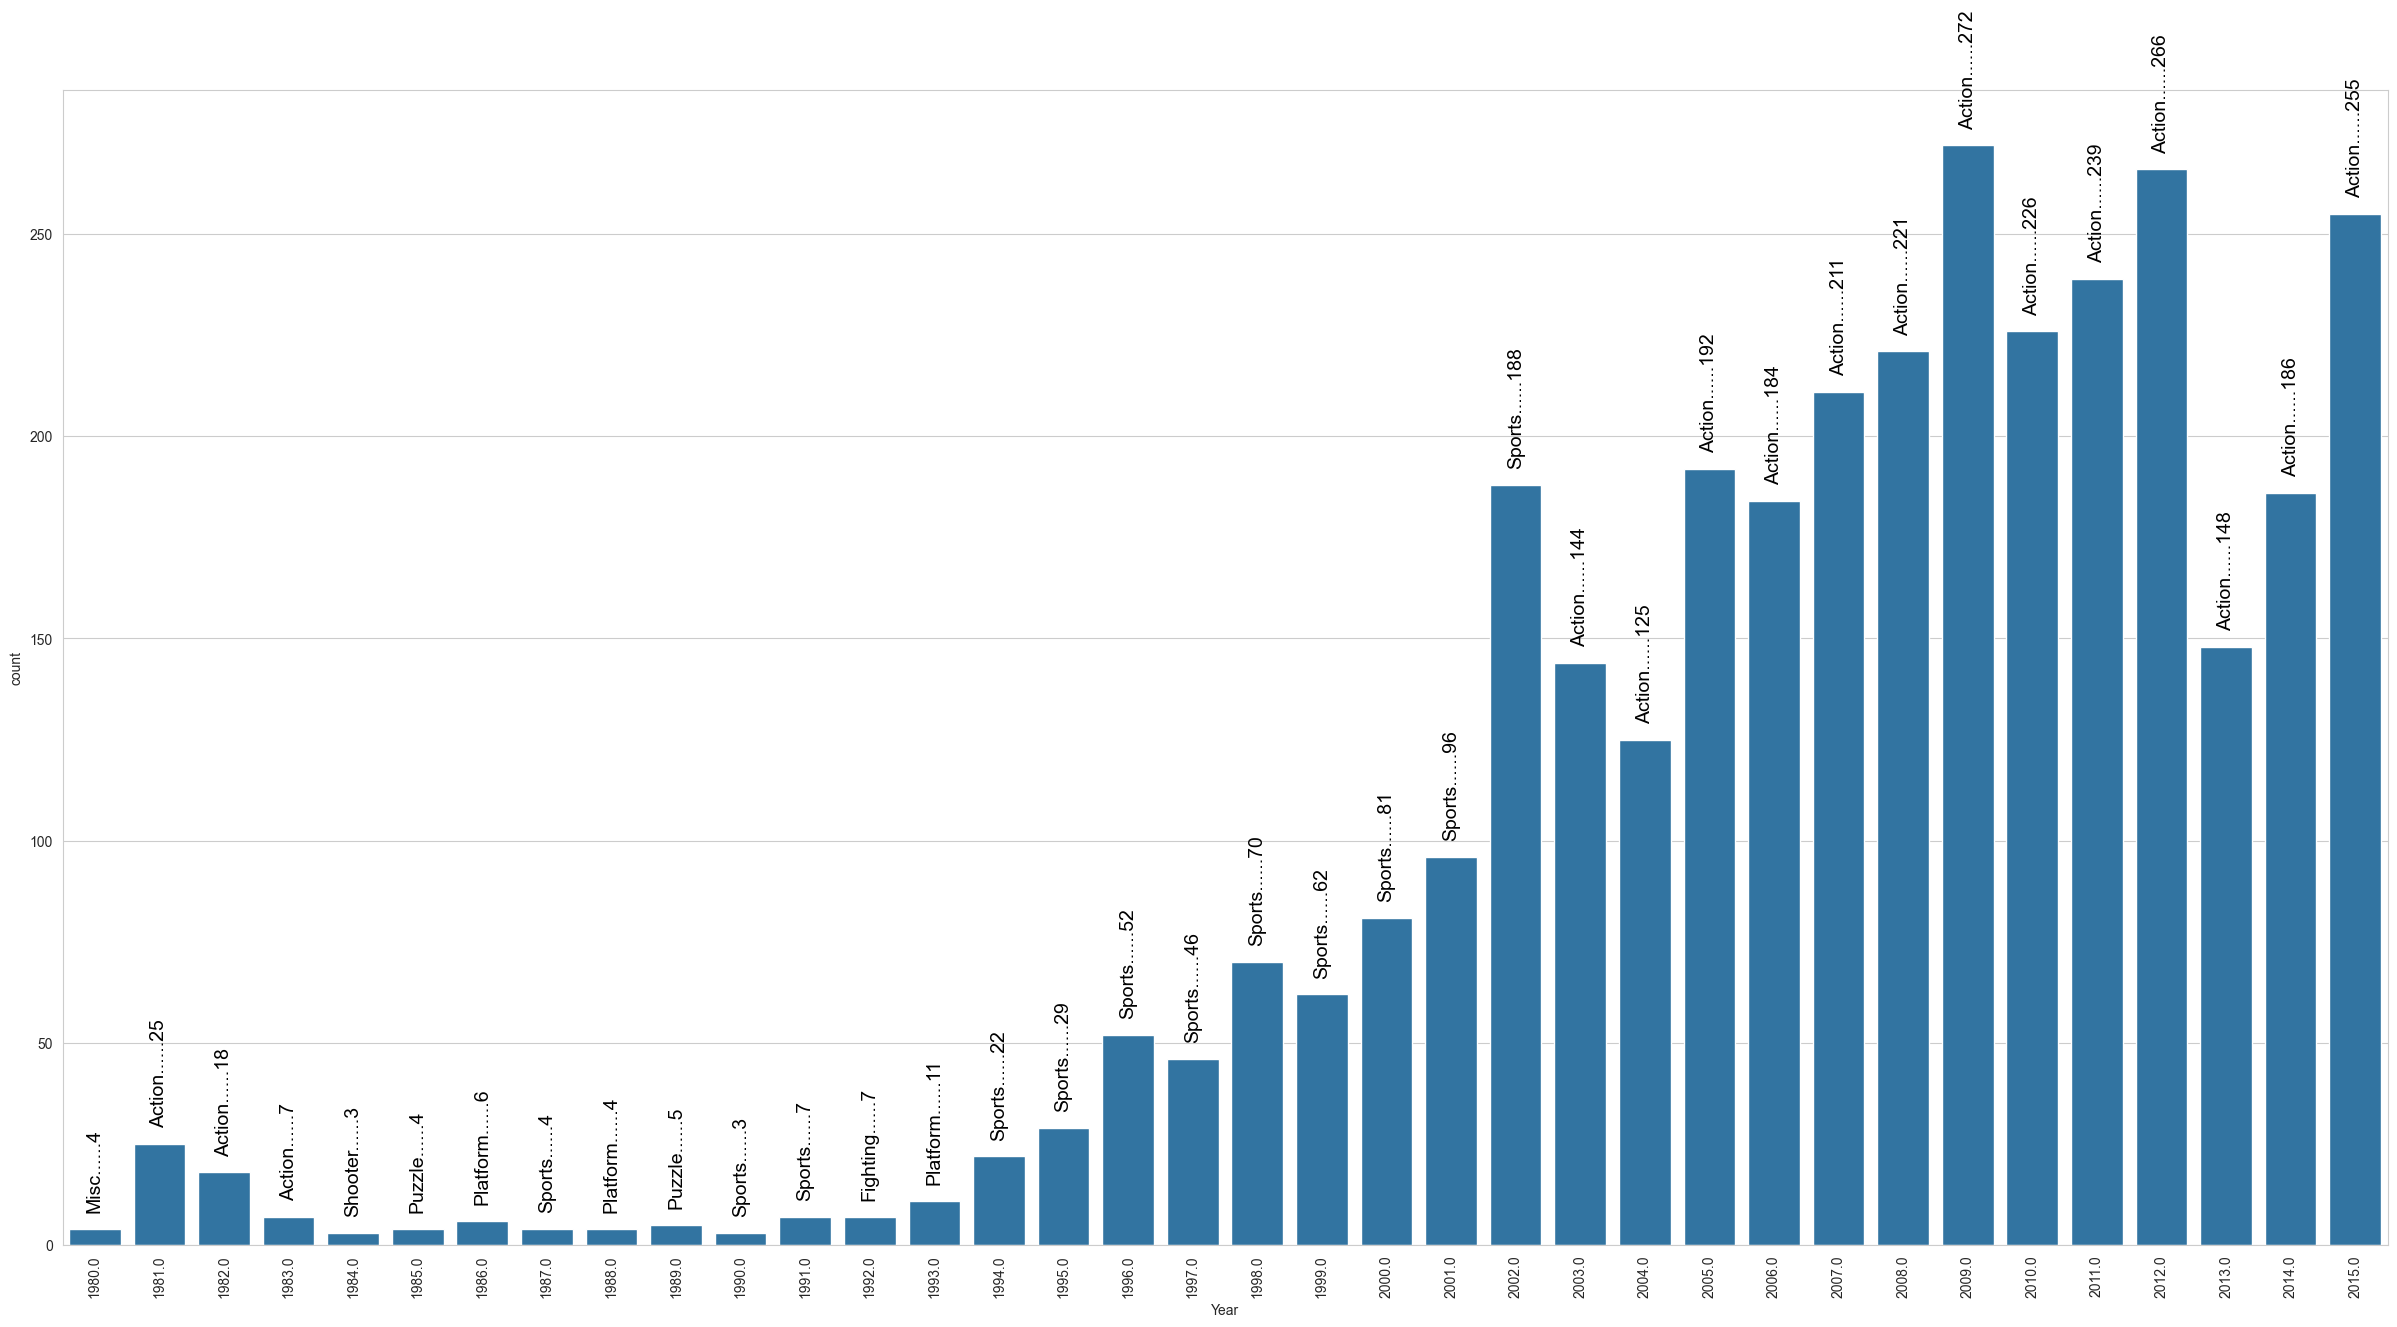

In [22]:
plt.figure(figsize=(30,15))
g = sns.barplot(x="Year",y="count",data=year_max_genre)
index=0
for value in year_max_genre["count"].values:
    g.text(index,value+5,str(genre[index] + "......"  + str(value)), color="#000", size=14, rotation=90, ha="center")
    index+=1
plt.xticks(rotation=90)
plt.show()

In [23]:
year_sale_dx = data.groupby(by=["Year","Genre"])["Global_Sales"].sum().reset_index()
year_sale = year_sale_dx.groupby(by=["Year"])["Global_Sales"].transform("max")==year_sale_dx["Global_Sales"]
year_sale_max=year_sale_dx[year_sale].reset_index(drop=True)

In [24]:
genre = year_sale_max["Genre"]

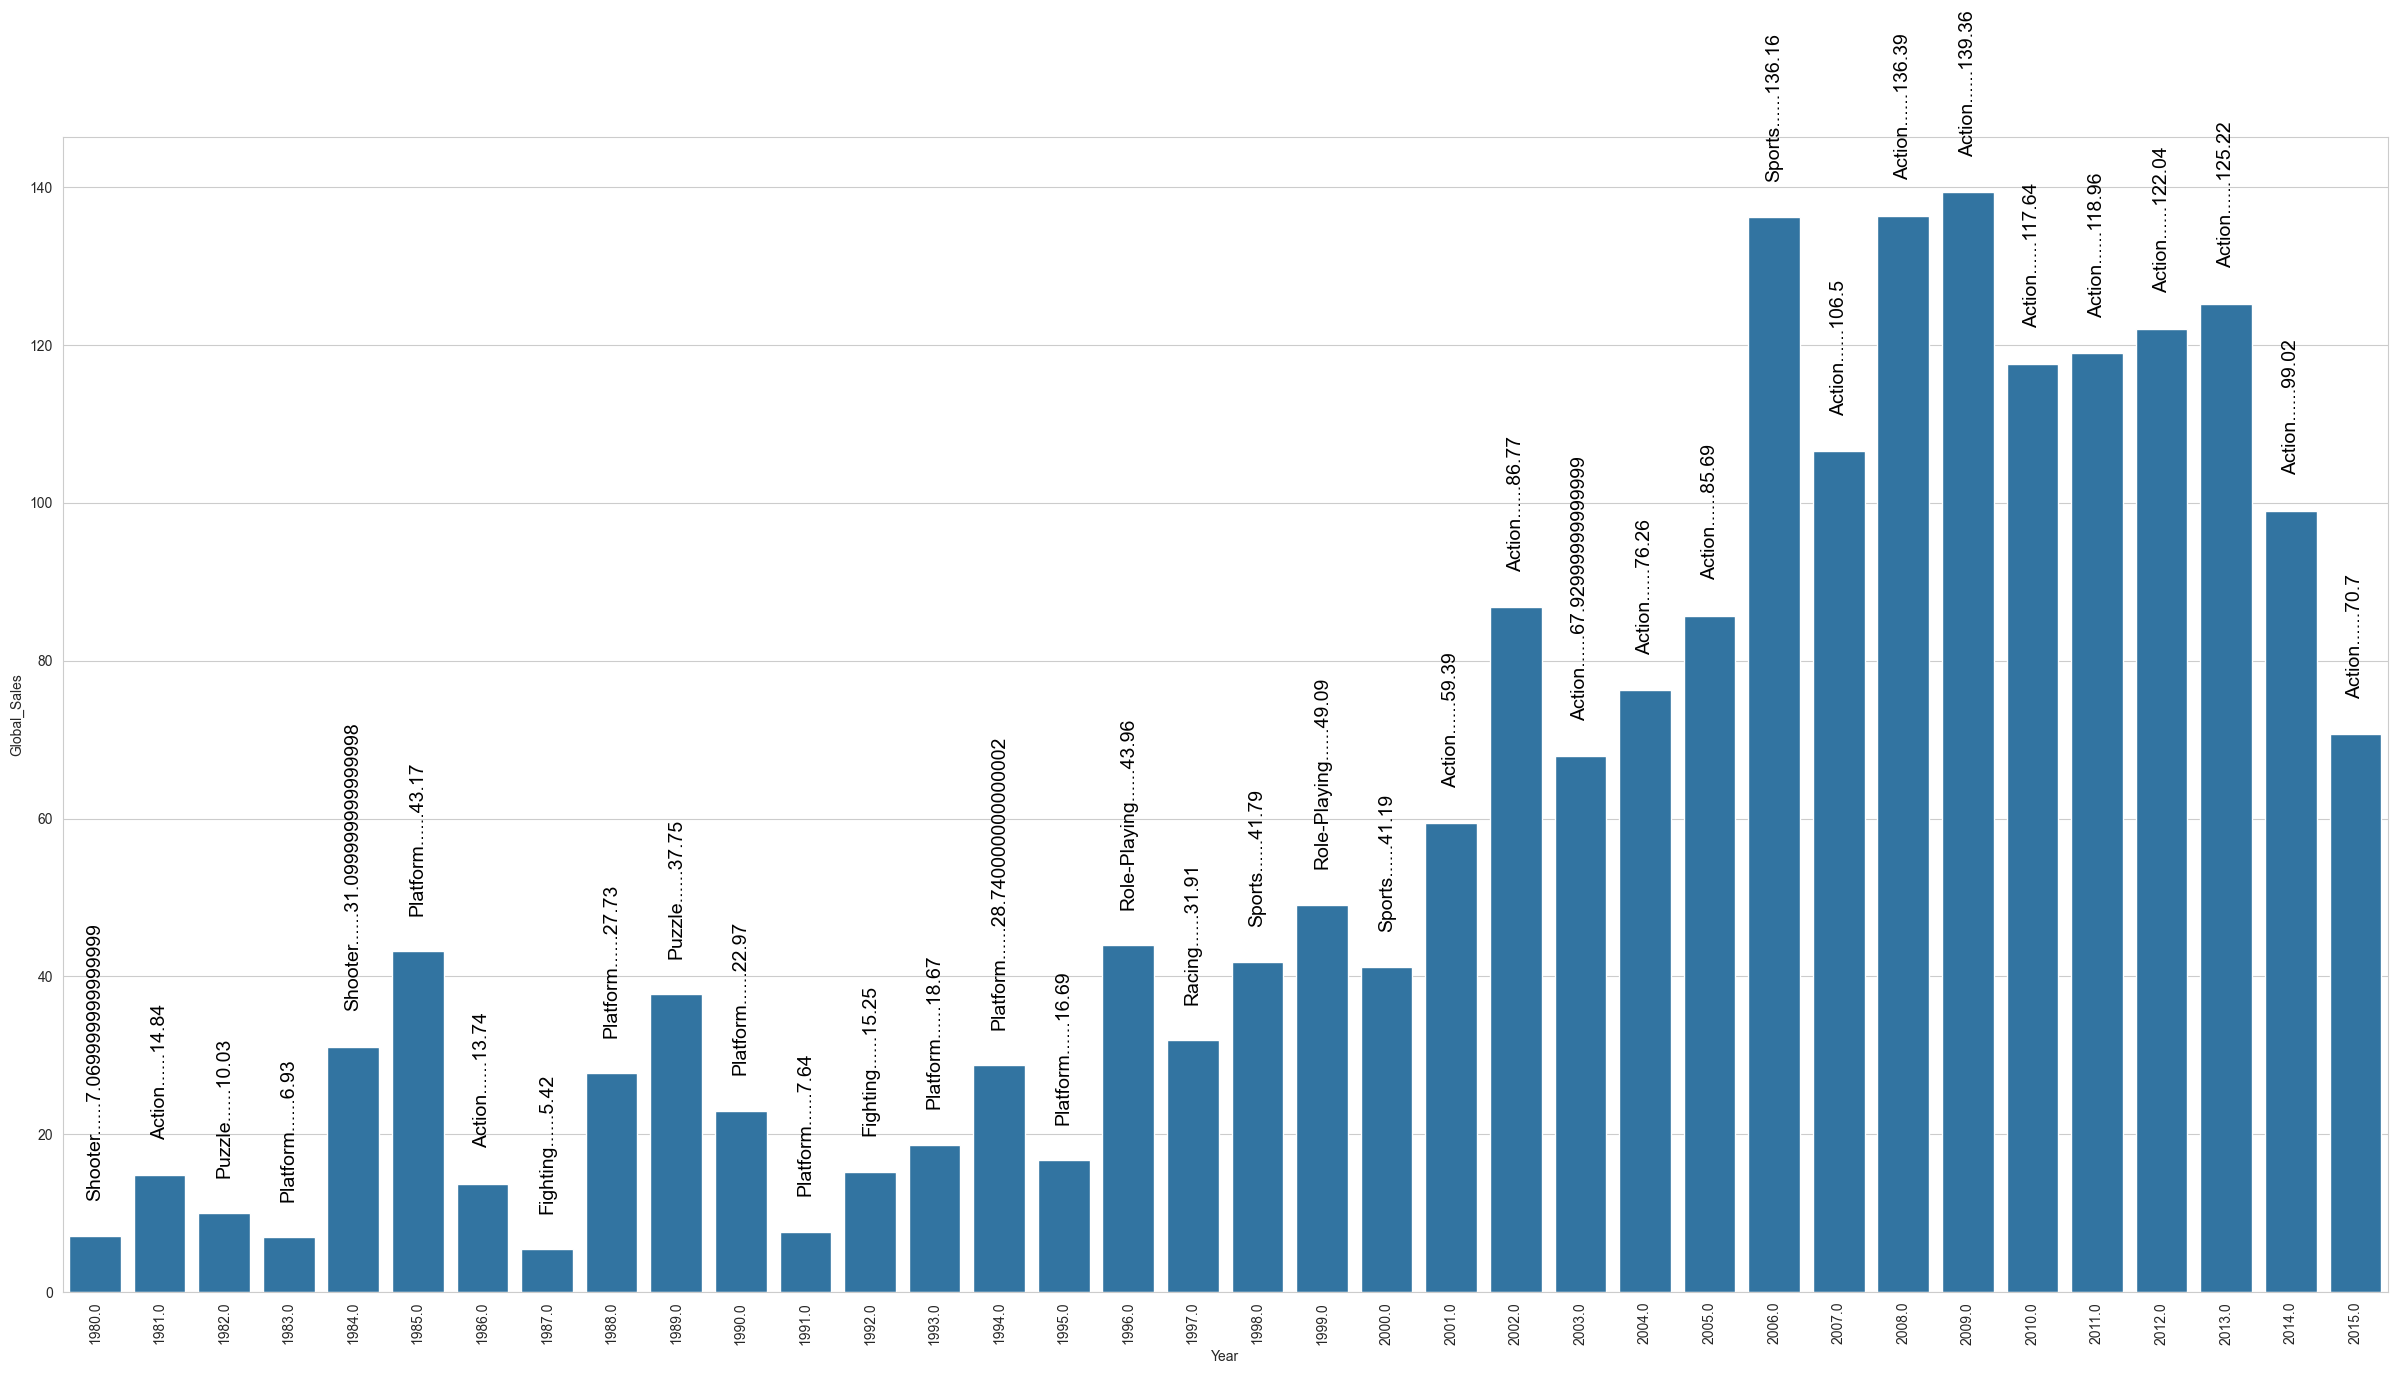

In [25]:
plt.figure(figsize=(30,15))
g = sns.barplot(x="Year",y="Global_Sales",data=year_sale_max)
index=0
for value in year_sale_max["Global_Sales"]:
    g.text(index,value+5,str(genre[index] + "......"  + str(value)), color="#000", size=14, rotation=90, ha="center")
    index+=1
plt.xticks(rotation=90)
plt.show()

In [26]:
# hangi tür oyunlar daha fazla satılmış. Her türün toplam küresel satış miktarı

data_genre = data.groupby(by=["Genre"])["Global_Sales"].sum()
data_genre = data_genre.reset_index() # index sütununu sıfırlar
data_genre=data_genre.sort_values(by=["Global_Sales"],ascending=False)

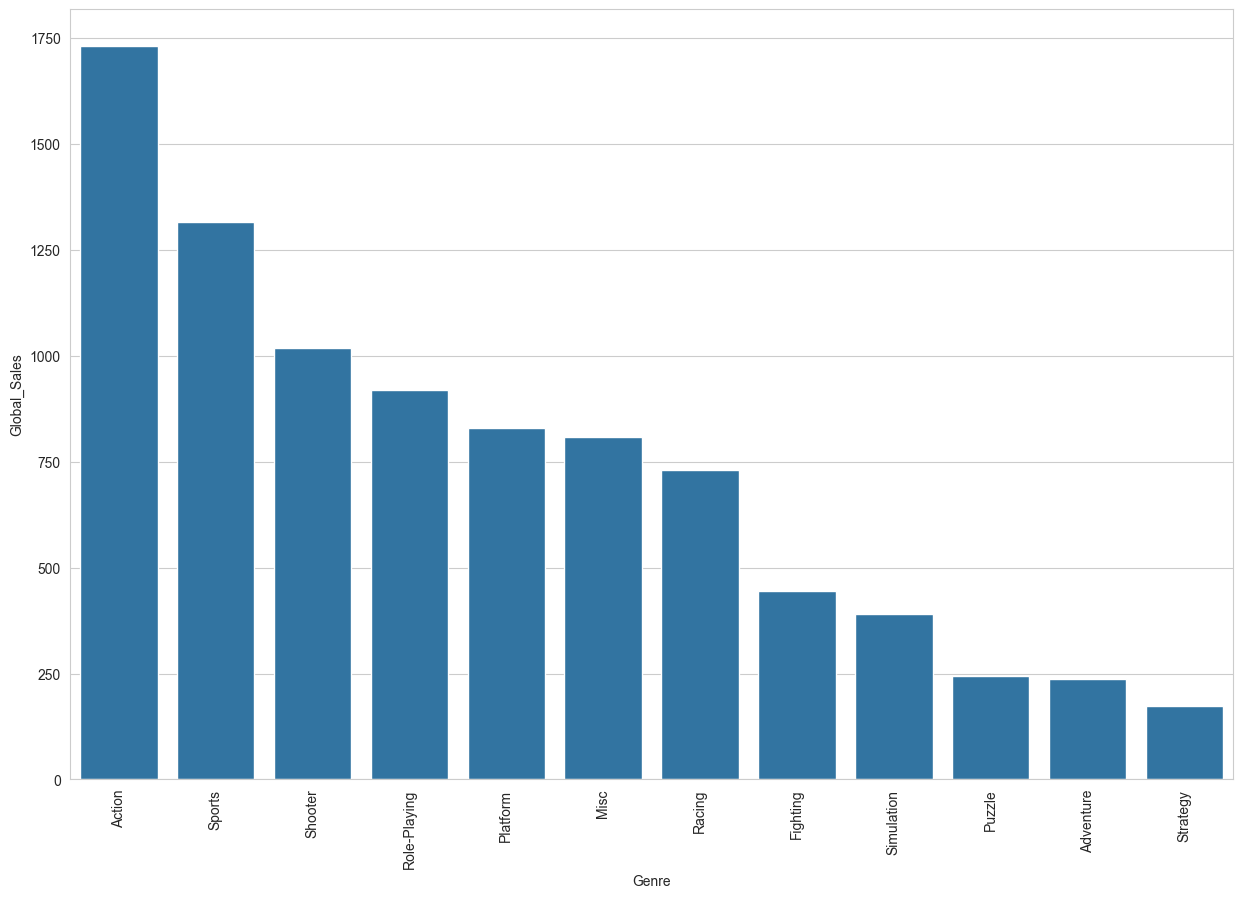

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x="Genre", y="Global_Sales",data=data_genre)
plt.xticks(rotation=90)
plt.show()

In [28]:
# küresel anlamda en fazla yüksek oyun veya satış platform değeri
data_platform = data.groupby(by=["Platform"])["Global_Sales"].sum()
data_platform = data_platform.reset_index() # dataframe e döndürmek için
data_platform = data_platform.sort_values(by=["Global_Sales"],ascending=False)

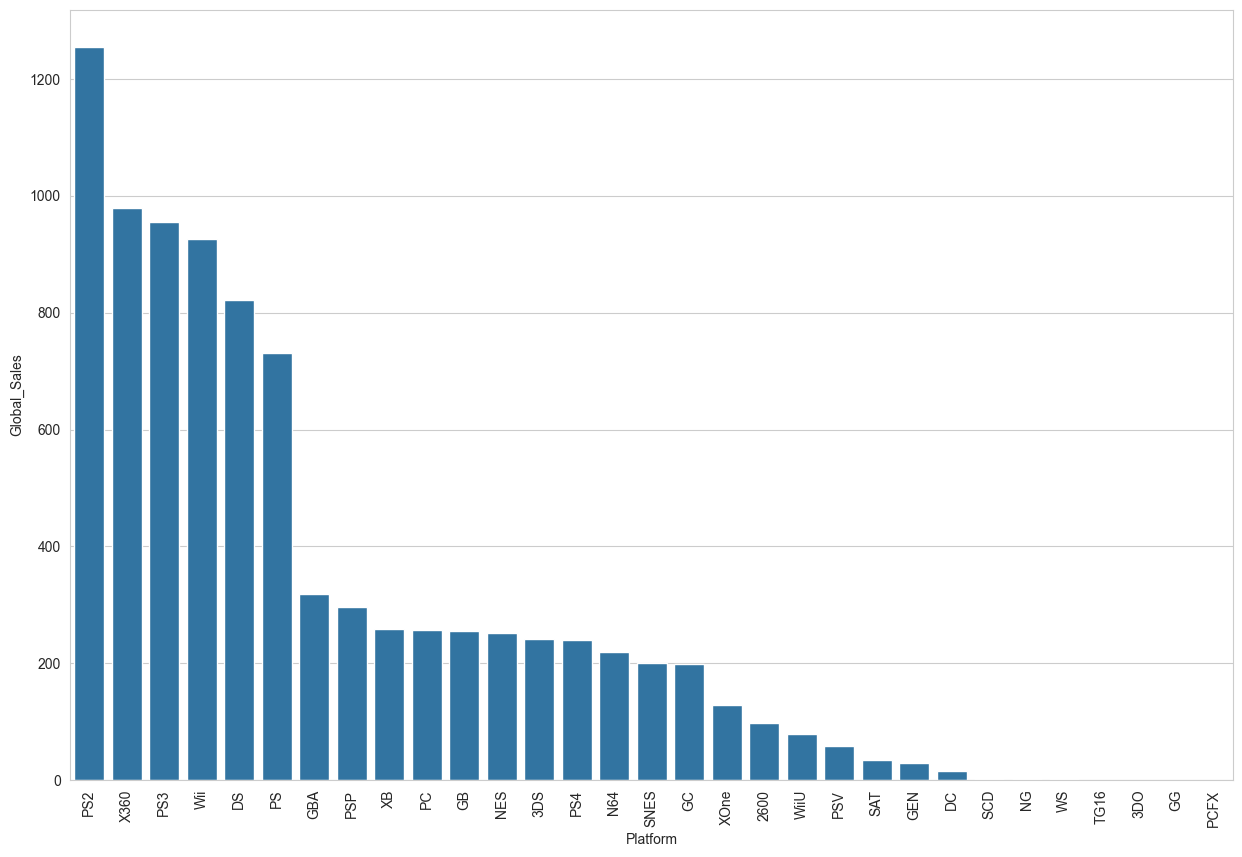

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x="Platform", y="Global_Sales",data=data_platform)
plt.xticks(rotation=90)
plt.show()

In [30]:
# bireysel olarak en yüksek satış fıyatına sahip bireysel oyun
top_game_sale = data.head(20) # ilk 20 satıra göre veri çerçevesi
top_game_sale = top_game_sale[["Name","Year","Genre","Global_Sales"]]
top_game_sale = top_game_sale.sort_values(by=["Global_Sales"],ascending=False)

In [31]:
name = top_game_sale["Name"]
year = top_game_sale["Year"]
y = np.arange(0,20)

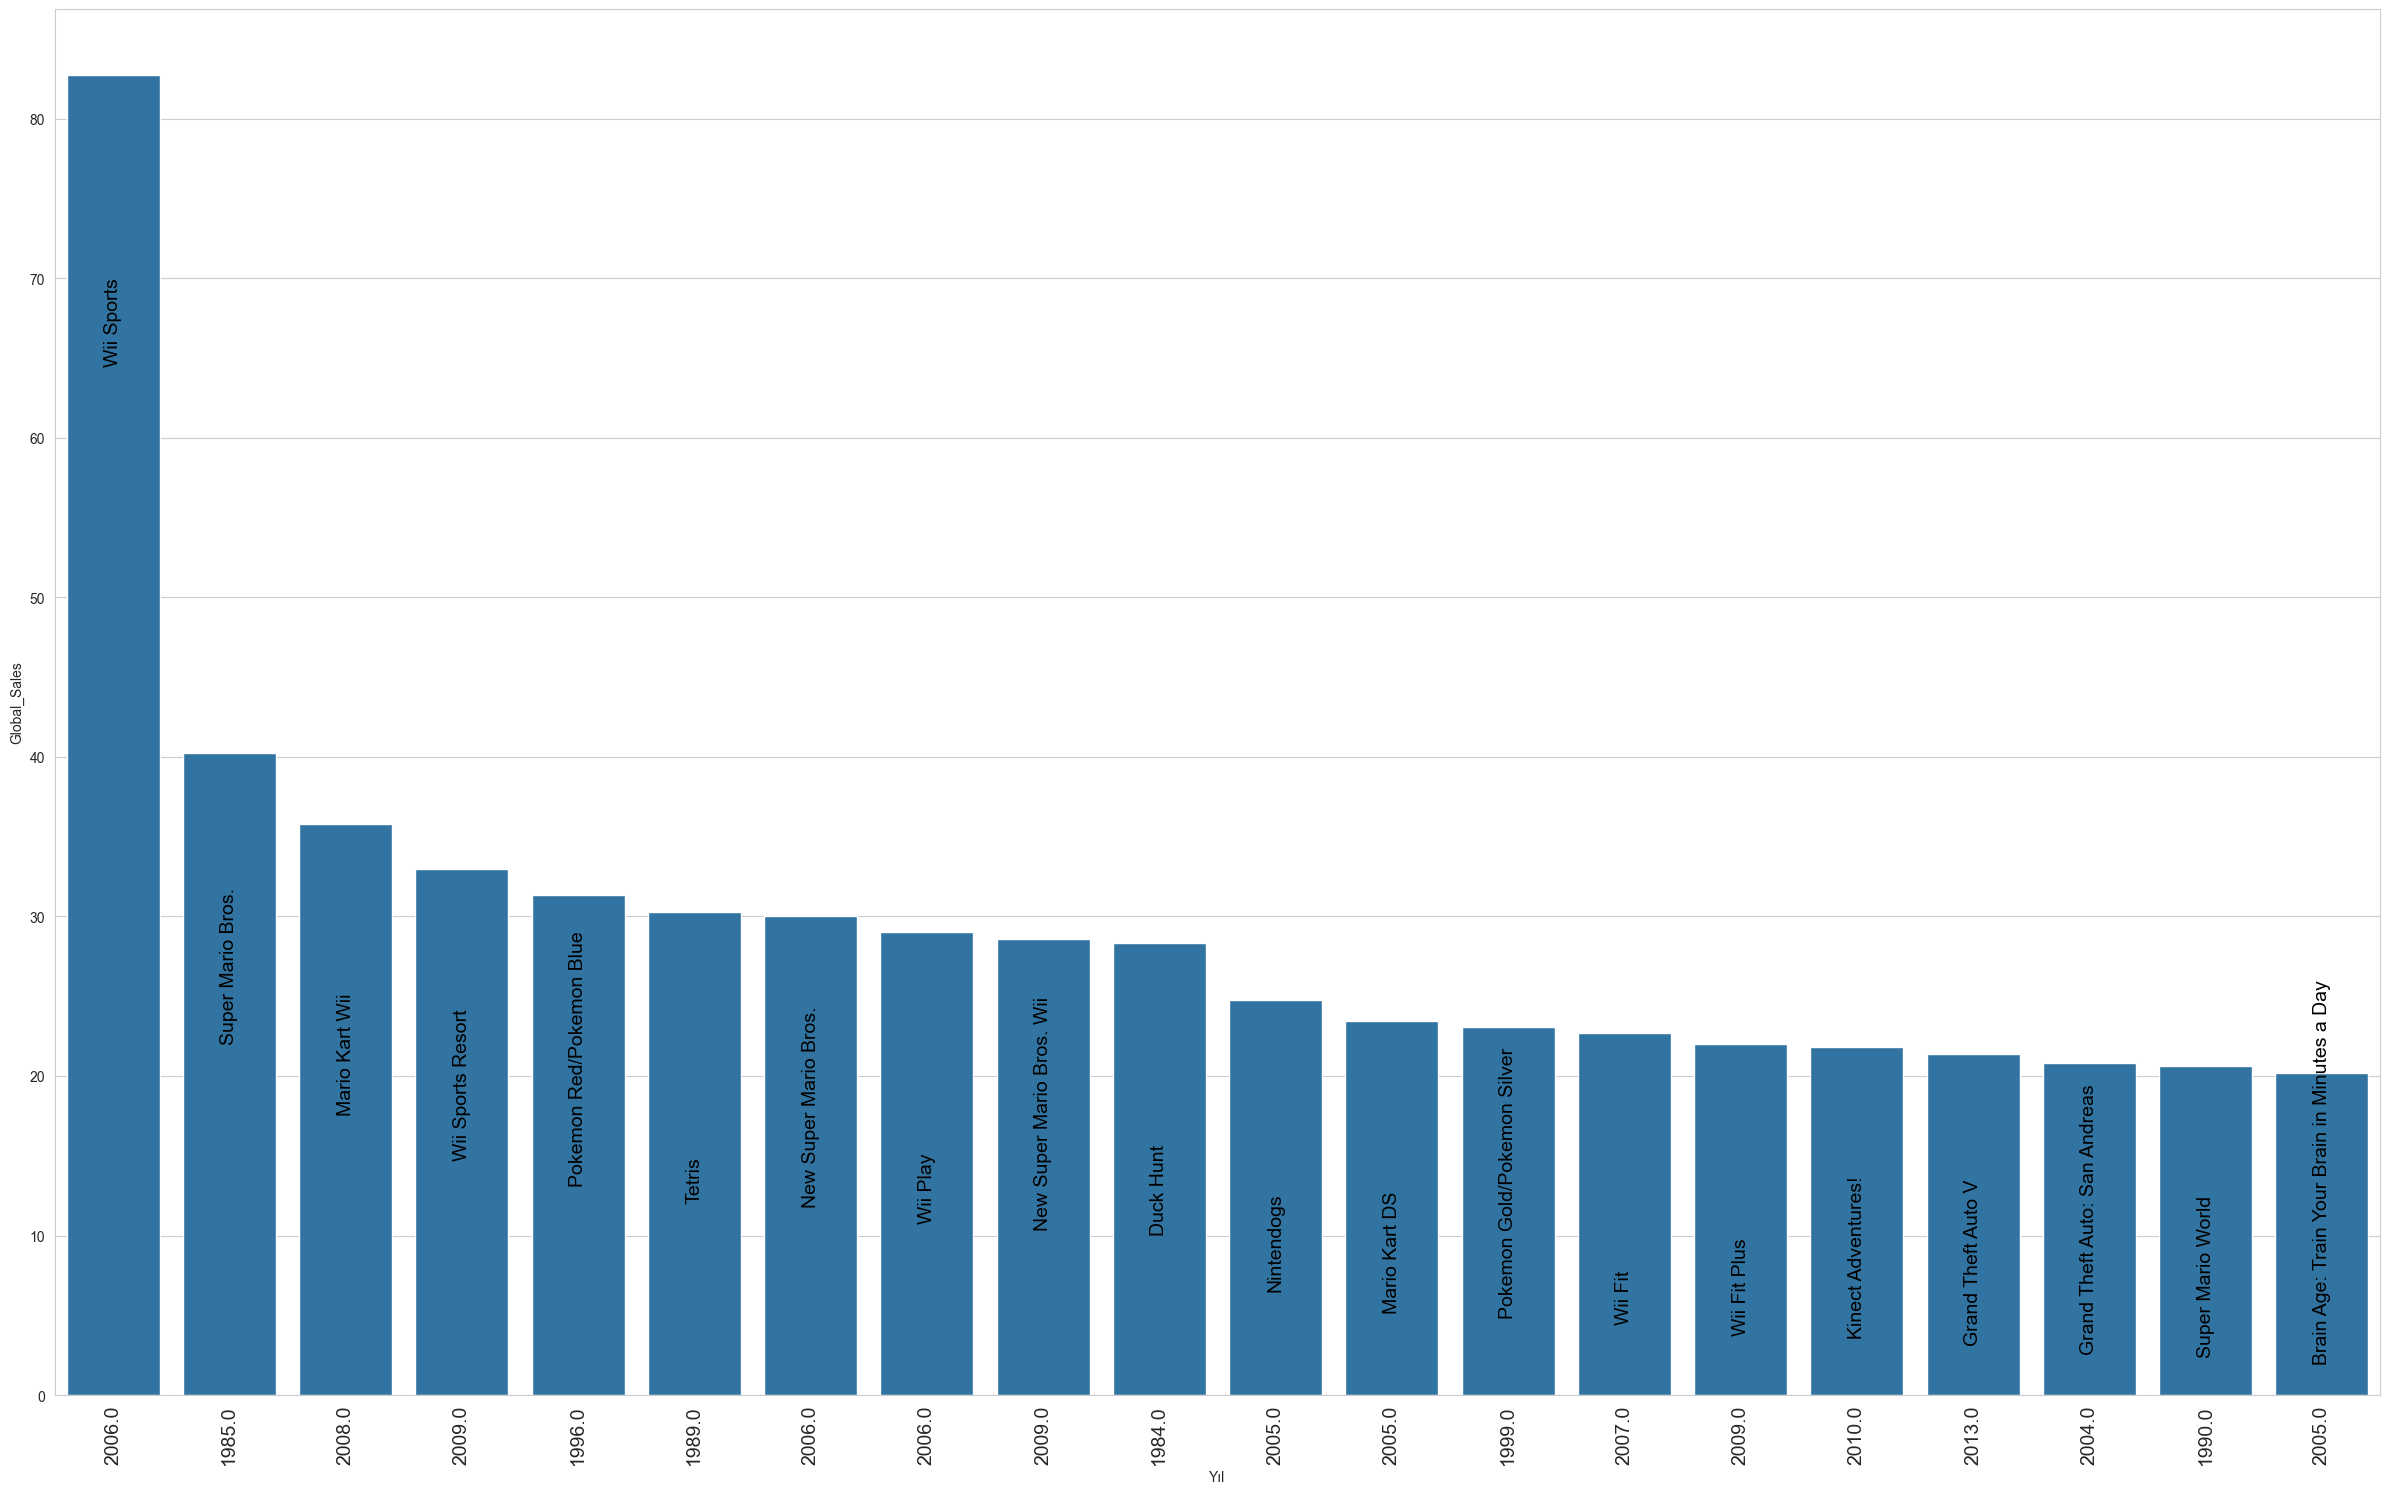

In [32]:
plt.figure(figsize=(30,18))
g = sns.barplot(x="Name",y="Global_Sales",data=top_game_sale)
index=0
for value in top_game_sale["Global_Sales"]:
    g.text(index,value-18,name[index], color="#000", size=14, rotation=90, ha="center")
    index+=1
plt.xticks(y,top_game_sale["Year"],fontsize=14,rotation=90)
plt.xlabel("Yıl")
plt.show()

In [33]:
# türlere göre satışlar
comp_genre = data[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
comp_map = comp_genre.groupby(by=["Genre"]).sum()

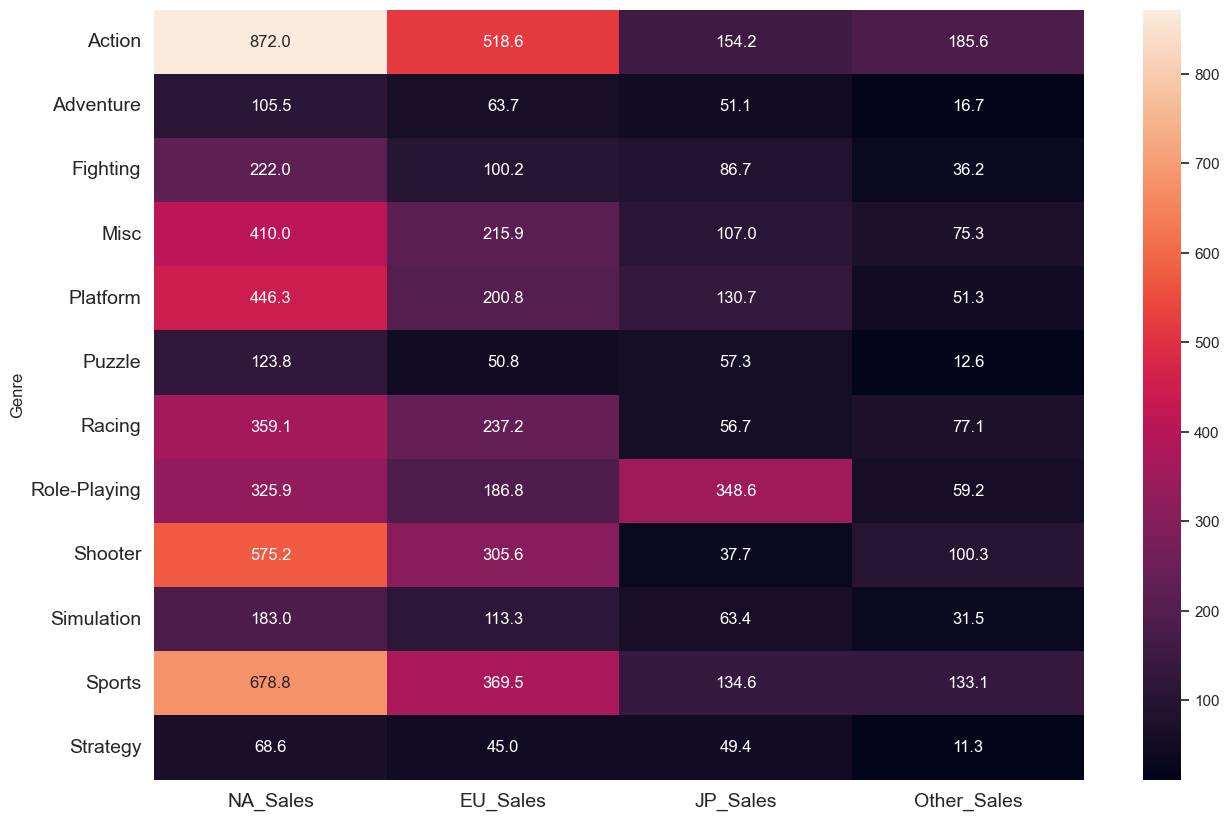

In [34]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(comp_map,annot=True, fmt=".1f")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [35]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table,id_vars=["Genre"],value_vars=["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],var_name="Sale_Area",value_name="Sale_price")
comp_table.head()

,Genre,Sale_Area,Sale_price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_price'>

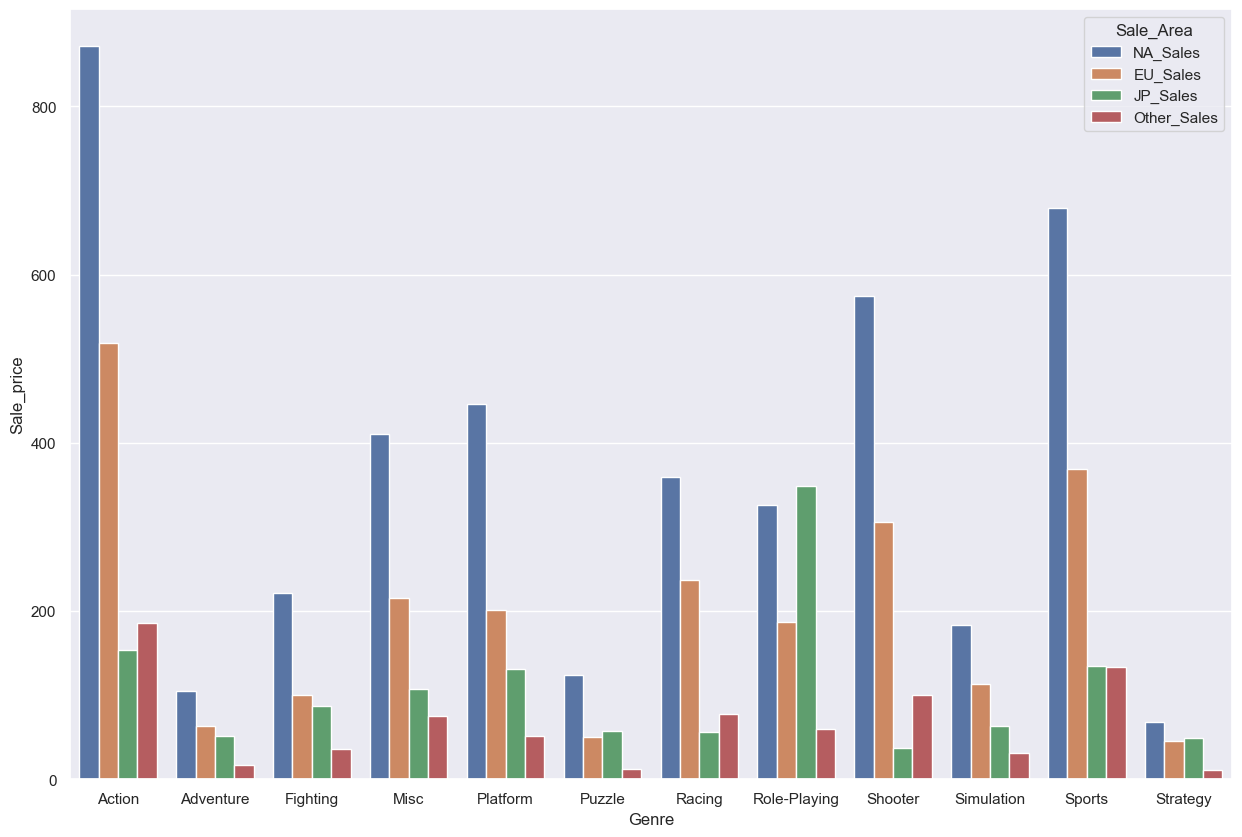

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x="Genre",y="Sale_price",hue="Sale_Area",data=comp_table)


In [37]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [38]:
# platformlara göre karşılaştırma
comp_platform = data[["Platform","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


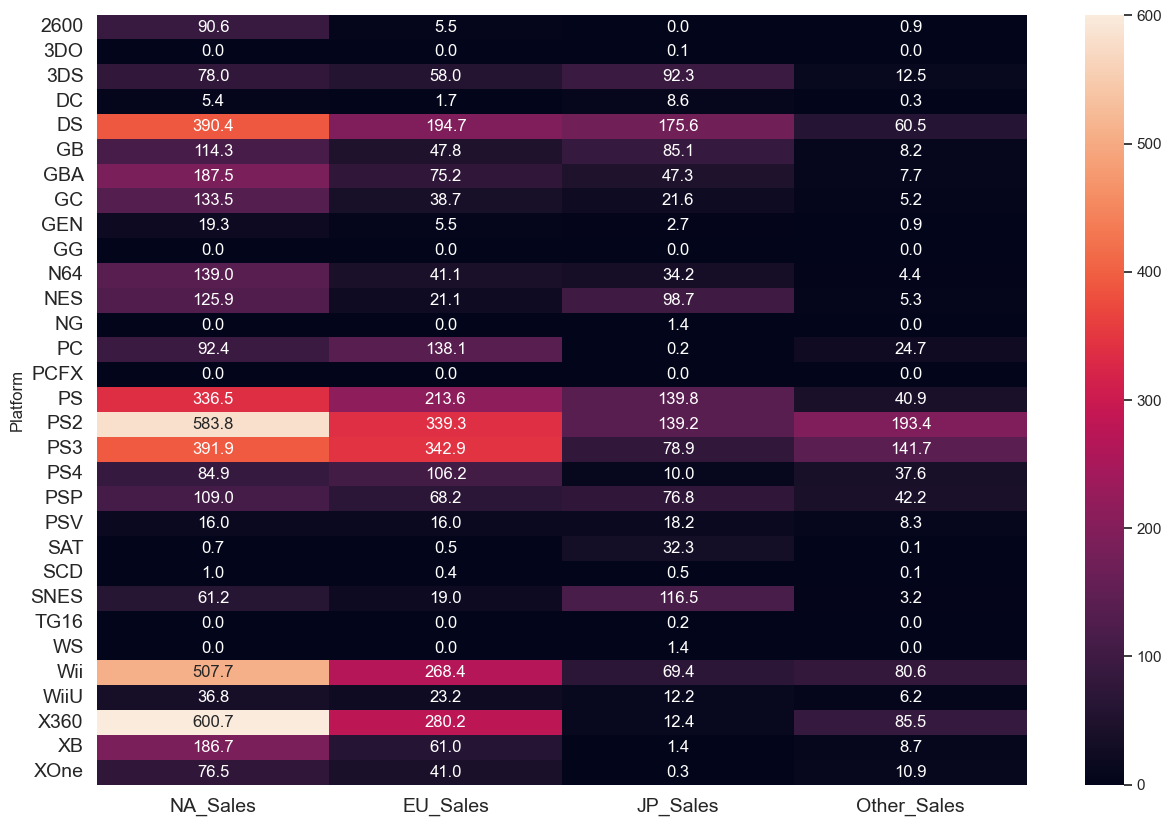

In [39]:
comp_pmap = comp_platform.groupby(by=["Platform"]).sum()
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(comp_pmap,annot=True, fmt=".1f")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [40]:
comp_ptable = comp_pmap.reset_index()


In [41]:
comp_ptable = pd.melt(comp_ptable,id_vars=["Platform"],value_vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],var_name="Sale_Area",value_name="Sale_price")


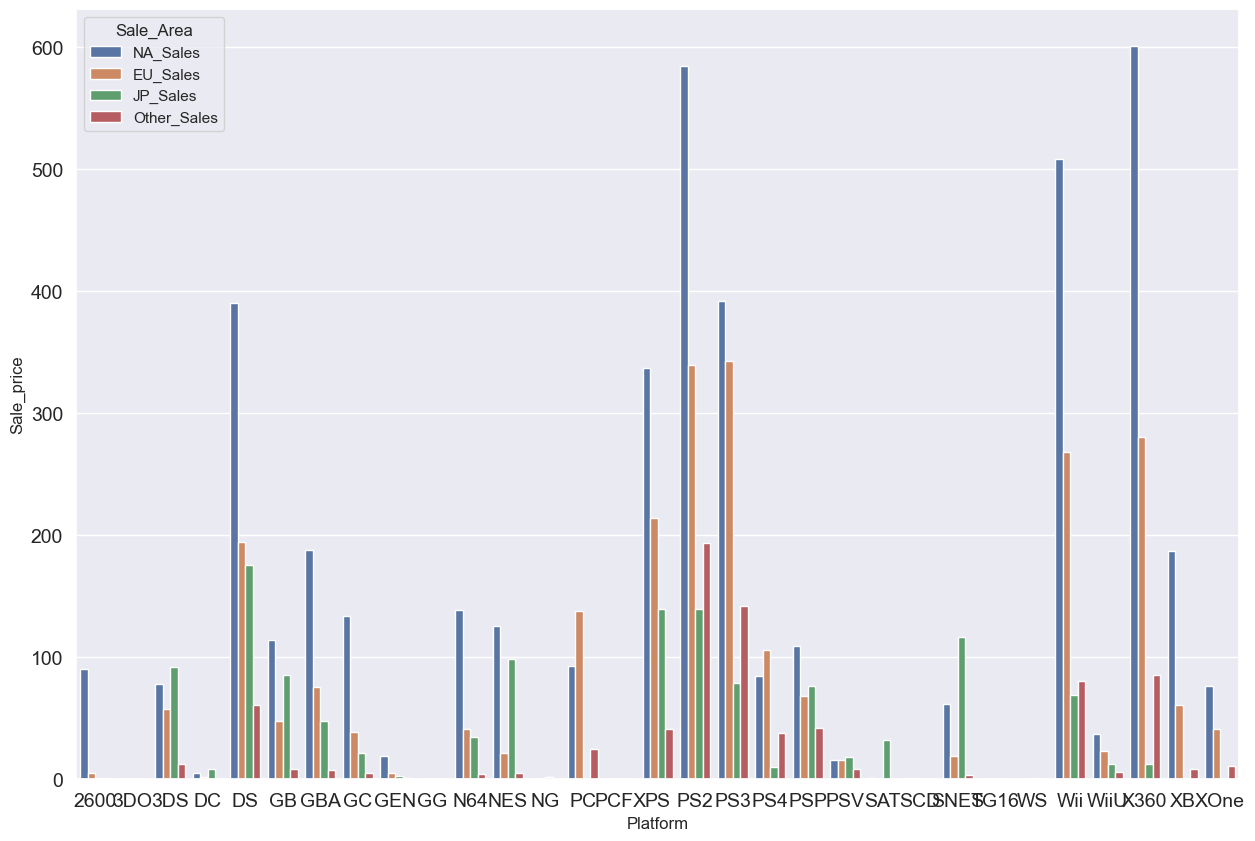

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(x="Platform",y="Sale_price",hue="Sale_Area",data=comp_ptable)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [43]:
# en iyi 20 yayıncı
top_publisher = data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).head(20) # büyükten küçüğe her yayıncı kaç yayın yapar
top_publisher = pd.DataFrame(top_publisher).reset_index() #dataframe oluştur

Durum,                Kullanılan Fonksiyon,   Girdi Olarak Verilen Veri,      İşlem Kim Yapar?
Sayım (Frekans),      sns.countplot,          Tüm Ham Veri (data),            countplot kendi içinde sayar.
Toplam Değer 
(Sum/Ortalama),       sns.barplot,            Önceden Özetlenmiş Veri         Pandas ile önceden özetlenir.
                                              (sale_publisher),

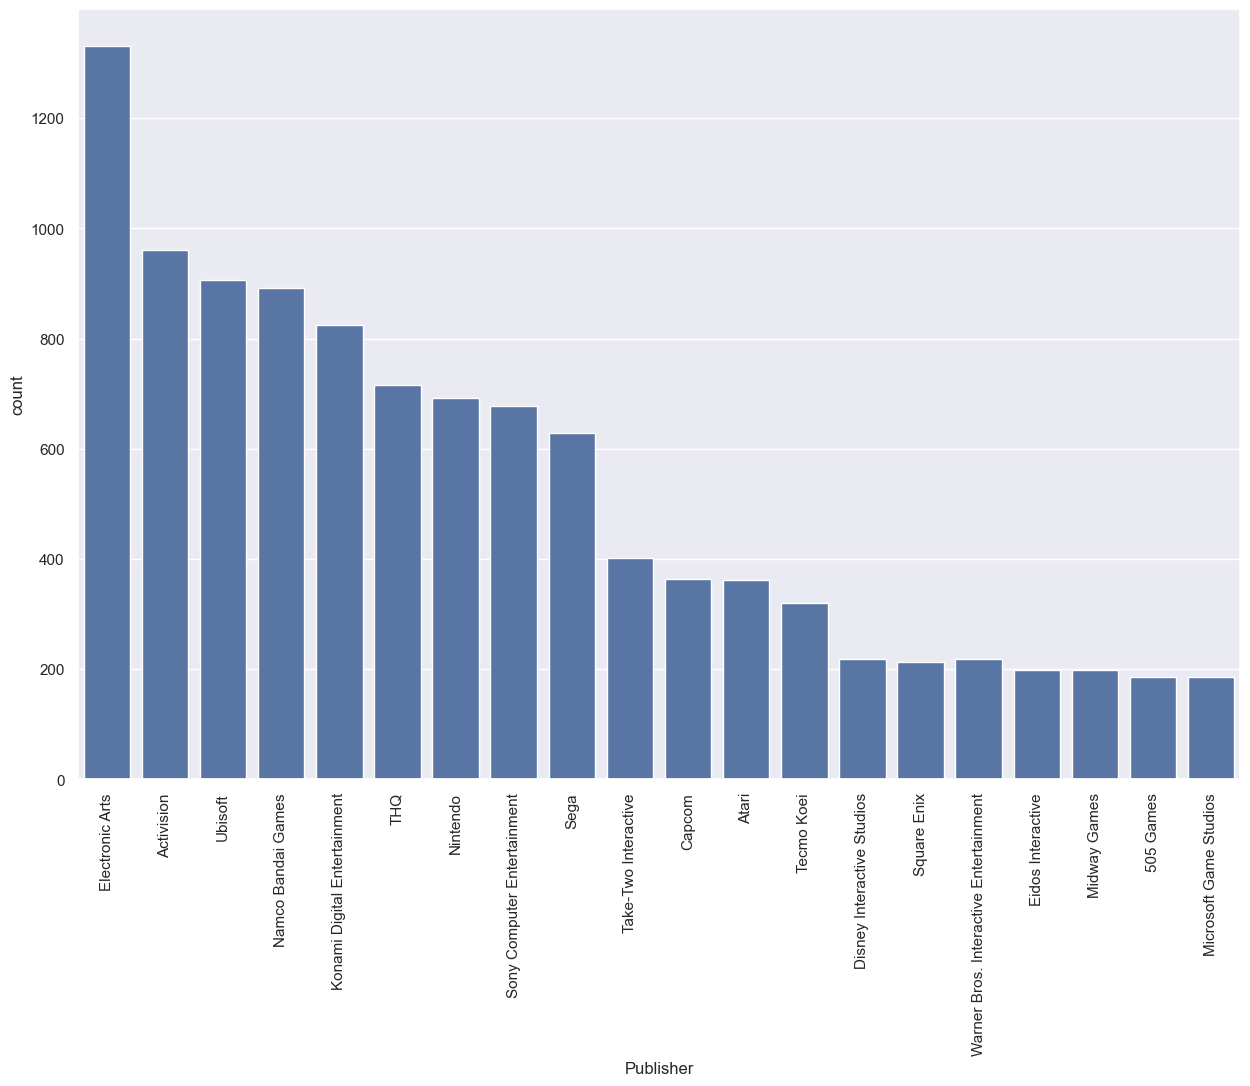

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(x="Publisher",data=data,order=data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.show()
# order parametresi yayıncıları sıralar ve ilk 20 yayıncıyı verir

In [45]:
# yayıncılar arasında en yüksek küresel satış
sale_publisher = data[["Publisher","Global_Sales"]]
sale_publisher = sale_publisher.groupby(by=["Publisher"])["Global_Sales"].sum().sort_values(ascending=False).head(5)
sale_publisher = pd.DataFrame(sale_publisher).reset_index()

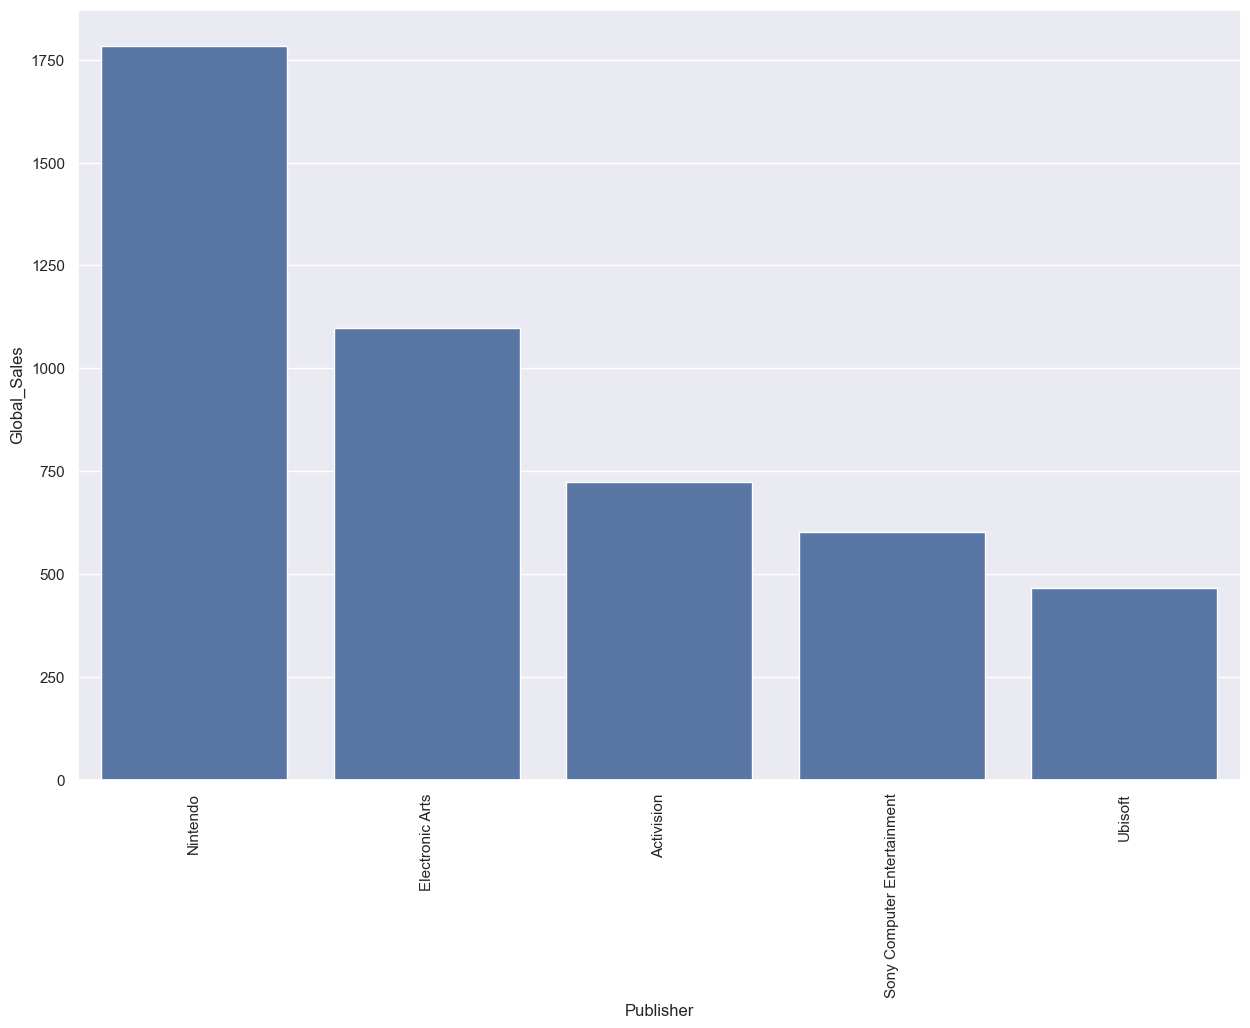

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x="Publisher", y="Global_Sales", data=sale_publisher)
plt.xticks(rotation=90)
plt.show()

In [54]:
# yayıncıları karşılaştır
comp_publisher = data[["Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [55]:
comp_publisher = comp_publisher.groupby(by=["Publisher"]).sum().reset_index().sort_values(by=["Global_Sales"],ascending=False) # global sales e göre sıralama yaptı
comp_publisher= comp_publisher.head(20)

In [56]:
comp_publisher = pd.melt(comp_publisher, id_vars=["Publisher"], value_vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"],var_name="Sale_Area",value_name="Sale_Price")
comp_publisher
# id vars publisher sütununu korur diğerleri birleşir
# value vars ülkeleri birleştirir

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
95,Disney Interactive Studios,Global_Sales,119.96
96,Eidos Interactive,Global_Sales,98.98
97,LucasArts,Global_Sales,87.34
98,Bethesda Softworks,Global_Sales,79.89


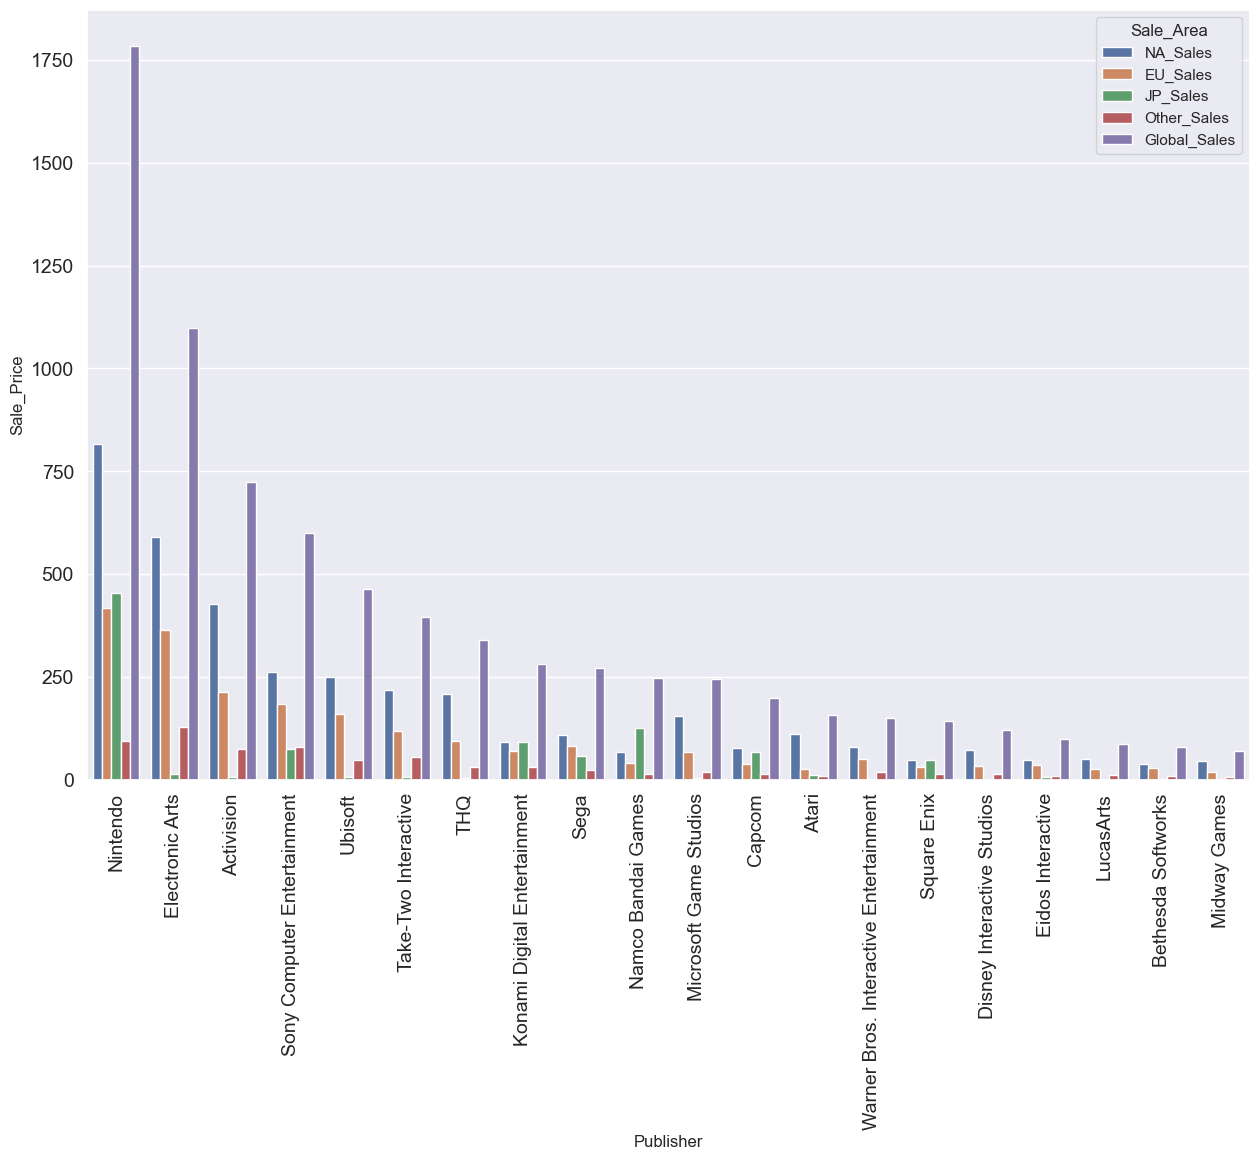

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x="Publisher", y="Sale_Price",hue="Sale_Area",data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()